# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [3]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True

meas.config_dict['meas_pv_info']['meas_device']['bounds'] = [-6, 6]
meas.config_dict['meas_pv_info']['meas_device']['settle_time'] = 0


In [4]:
# Convenience methods.
meas.quad_init, meas.quad_bounds

([-6, -4, -2, 0], [-6, 6])

In [5]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [6]:
meas.config_dict['meas_pv_info']['meas_device']

{'settle_time': 0,
 'bounds': [-6, 6],
 'pv': {'name': 'QUAD:HTR:120',
  'cntrl': 'QUAD:HTR:120:BCTRL',
  'read': 'QUAD:HTR:120:BACT'},
 'pv_unit': 'kG'}

In [7]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-06-03 16:05:46,178 | INFO : Running online!
2023-06-03 16:05:46,209 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-06-03 16:05:46,472 | INFO : 2023-06-03_16-05-46-472524
2023-06-03 16:05:46,540 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-06-03 16:05:46,675 | INFO : 2023-06-03_16-05-46-675481
2023-06-03 16:05:46,725 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-06-03 16:05:46,858 | INFO : 2023-06-03_16-05-46-858457
2023-06-03 16:05:46,905 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-06-03 16:05:47,043 | INFO : 2023-06-03_16-05-47-043306
2023-06-03 16:05:47,091 | INFO : Adapting ranges
2023-06-03 16:05:47,092 | INFO : Adapting ranges for x beam size measurement: [-0.7442671099510828, -0.2035559249592357, 0.3371552600326114, 0.8778664450244585, 1.4185776300163058, 1.9592888150081529, 2.5]
2023-06-03 16:05:47,093 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7442671099510828
2023-06-03 16:05:47,234 | INFO : 2023-06-03_16-05-47-234219
2023-06-03 16:05:47,283 | INFO : EPICS put QU

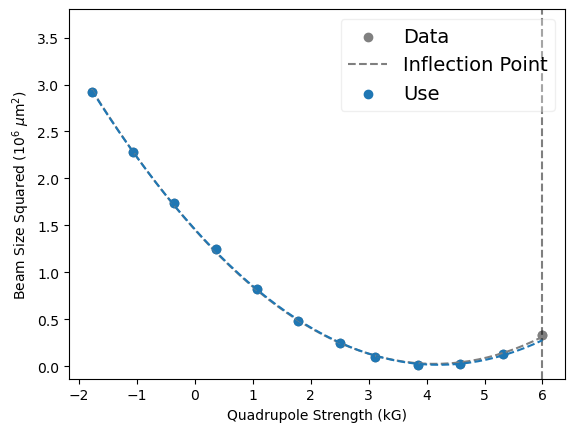

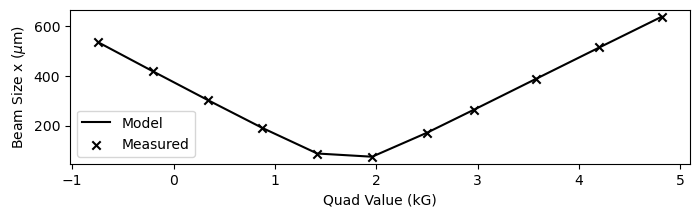

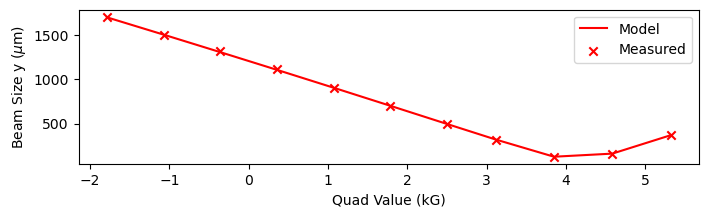

In [8]:
result = meas.measure_emittance()

# Examine results

In [9]:
import matplotlib.pyplot as plt

In [10]:
result

{'quadvalsx': array([-0.74426711, -0.20355592,  0.33715526,  0.87786645,  1.41857763,
         1.95928882,  2.5       ,  2.96346673,  3.58142237,  4.19937801,
         4.81733365]),
 'beamsizesx': array([5.35870954e-04, 4.19710673e-04, 3.04203084e-04, 1.90583906e-04,
        8.74004814e-05, 7.46113543e-05, 1.70720244e-04, 2.62635647e-04,
        3.89526854e-04, 5.14443141e-04, 6.37997414e-04]),
 'beamsizeserrx': array([0.02692576, 0.02143253, 0.01259972, 0.00716445, 0.00177698,
        0.00152219, 0.0048818 , 0.00928422, 0.01681259, 0.02953205,
        0.04021761]),
 'error_x': False,
 'emit_x': 6.454369496583822e-09,
 'norm_emit_x': 1.0104502682269543e-06,
 'beta_x': 9.881838021028889,
 'alpha_x': -1.978454442098769,
 'emit_x_err': 1.8178853092631118e-07,
 'norm_emit_x_err': 2.845952186844864e-05,
 'beta_x_rel_err': 28.16518809816025,
 'alpha_x_rel_err': -1.7658098920147192e-15,
 'sigma_11': 6.378103389311111e-08,
 'sigma_12': 1.276967600146306e-08,
 'sigma_22': 3.2097866447863456e-09

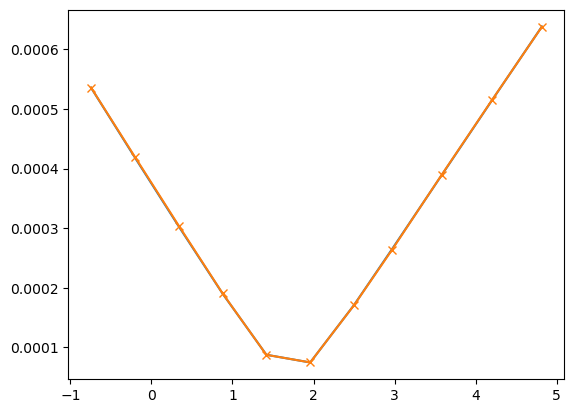

In [11]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

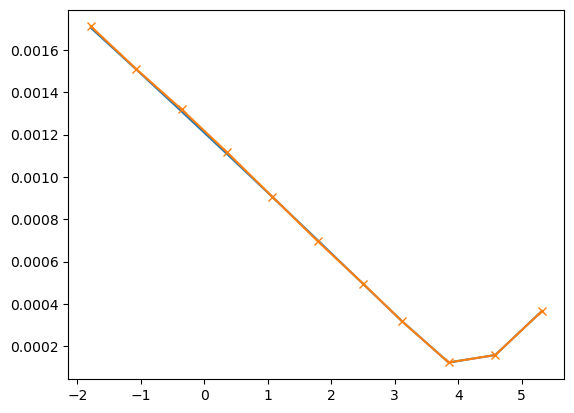

In [12]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


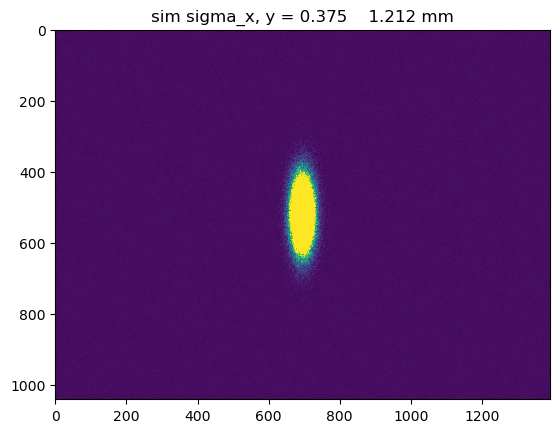

In [13]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)